<a href="https://colab.research.google.com/github/Sajjubuoy/AI-Based-Cyber-Security-Threats-Prediction-AI-Agent/blob/main/ImplementationOfXGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are noe preprocessing Training set from out UNSW_NB15 dataset

Importing Libraries


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


Loading Dataset


In [5]:
df = pd.read_csv('/content/UNSW_NB15_training-set.csv')
print("Initial shape:", df.shape)
df.head()

Initial shape: (82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


Before cleaning or encoding, we must understand your dataset’s structure

In [6]:
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nColumns list:\n", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

Drop Unnecessary Columns and Removing Duplicates and identifiers

In [7]:
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)

Shape after dropping duplicates: (55945, 44)


Handling Missing Values (Replace '-' or other invalid entries with NaN)

In [8]:
df.replace('-', pd.NA, inplace=True)
df.dropna(inplace=True)

print("Shape after cleaning missing values:", df.shape)

Shape after cleaning missing values: (18918, 44)


Encode Categorical Columns

In [9]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns found:", cat_cols.tolist())

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

Categorical columns found: ['proto', 'service', 'state', 'attack_cat']


Scale Numeric Columns

In [10]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('label', errors='ignore')
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Scaled numerical columns successfully.")

Scaled numerical columns successfully.


Final Preprocessed Data

In [12]:
print("Final shape:", df.shape)
df.head()

Final shape: (18918, 44)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
35,0.018353,-0.692021,0.30498,-0.003973,-0.086354,-0.107928,-0.063896,-0.089139,-0.323436,-0.534977,...,-0.30631,-0.268545,-0.168949,-0.168802,0.626959,-0.542494,-0.241246,0.0,0.774532,0
40,0.196907,-0.692021,0.30498,-0.003973,-0.086354,-0.097260,-0.063860,-0.088763,-0.323482,-0.534977,...,-0.30631,-0.268545,-0.168949,-0.168802,0.626959,-0.542494,-0.241246,0.0,0.774532,0
45,0.042797,-0.692021,0.30498,-0.003973,-0.086354,-0.107928,-0.063846,-0.089292,-0.323447,-0.534977,...,-0.30631,-0.380659,-0.168949,-0.168802,0.626959,-0.228226,-0.462999,0.0,0.774532,0
49,0.020514,-0.692021,0.30498,-0.003973,-0.086354,-0.097260,-0.063938,-0.088171,-0.323418,-0.534977,...,-0.30631,-0.268545,-0.168949,-0.168802,0.626959,-0.542494,-0.352123,0.0,0.774532,0
72,0.121863,-0.692021,0.30498,-0.003973,-0.077123,-0.107928,-0.063606,-0.089348,-0.323461,-0.534977,...,-0.30631,-0.380659,-0.168949,-0.168802,0.626959,-0.385360,-0.462999,0.0,0.774532,0


Save Preprocessed Data for not running all the cells again

In [13]:
df.to_csv('/content/UNSW_NB15_training_preprocessed.csv', index=False)
print("Preprocessed data saved as 'UNSW_NB15_training_preprocessed.csv'")

Preprocessed data saved as 'UNSW_NB15_training_preprocessed.csv'


We are noe preprocessing Testing set from out UNSW_NB15 dataset

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv('/content/UNSW_NB15_testing-set.csv')
print("Initial shape:", df.shape)
df.head()

Initial shape: (175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [17]:
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nColumns list:\n", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

Drop Unnecessary Columns

In [18]:
# Remove 'id' column if exists
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Remove duplicates if any
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)

Shape after dropping duplicates: (107740, 44)


 Handle Missing or Invalid Values

In [19]:
# Replace '-' with NaN and drop rows containing NaN
df.replace('-', pd.NA, inplace=True)
df.dropna(inplace=True)
print("Shape after handling missing values:", df.shape)

Shape after handling missing values: (42789, 44)


Encode Categorical Columns

In [20]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns found:", cat_cols.tolist())

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

Categorical columns found: ['proto', 'service', 'state', 'attack_cat']


Scale Numeric Columns

In [21]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('label', errors='ignore')
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Scaled numerical columns successfully.")

Scaled numerical columns successfully.


Final Preprocessed Data Check

In [22]:
print("Final shape:", df.shape)
df.head()

Final shape: (42789, 44)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,0.091910,-0.592960,-0.723267,0.167618,-0.096340,-0.116763,-0.077940,-0.108878,-0.232893,-0.433554,...,-0.263095,-0.128828,4.597537,4.597537,-0.529312,-0.376106,-0.385137,0.0,0.853807,0
11,0.184323,-0.592960,1.772462,0.167618,0.096877,-0.025448,0.086146,-0.102658,-0.232556,-0.433554,...,-0.263095,-0.265961,-0.209520,-0.209520,-0.529312,-0.547903,-0.385137,0.0,0.853807,0
15,-0.285799,1.686455,2.188417,2.124568,-0.134983,-0.185250,-0.079383,-0.112200,5.611777,1.586490,...,-0.263095,0.008304,-0.209520,-0.209520,-0.529312,-0.376106,-0.385137,0.0,0.853807,0
17,-0.197404,-0.592960,0.108643,0.167618,-0.104069,-0.139592,-0.077256,-0.107472,-0.232548,-0.433554,...,-0.263095,-0.265961,-0.209520,-0.209520,0.665809,-0.547903,-0.102700,0.0,0.853807,0
21,-0.209878,-0.592960,0.108643,0.167618,-0.104069,-0.151007,-0.076850,-0.111044,-0.232534,1.586490,...,-0.263095,-0.403093,-0.209520,-0.209520,0.665809,-0.376106,-0.102700,0.0,0.853807,0


Save Preprocessed Testing Data

In [23]:
df.to_csv('/content/UNSW_NB15_testing_preprocessed.csv', index=False)
print(" Testing data saved as 'UNSW_NB15_testing_preprocessed.csv'")

 Testing data saved as 'UNSW_NB15_testing_preprocessed.csv'


Loading Preprocessed Data

In [24]:
import pandas as pd


train_df = pd.read_csv('/content/UNSW_NB15_training_preprocessed.csv')
test_df  = pd.read_csv('/content/UNSW_NB15_testing_preprocessed.csv')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (18918, 44)
Test shape: (42789, 44)


Split Features and Target

In [25]:
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

Train the XGBoost Model

In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=250,        # number of trees
    learning_rate=0.1,       # step size shrinkage
    max_depth=6,             # tree depth
    subsample=0.8,           # for preventing overfitting
    colsample_bytree=0.8,    # column sampling
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
print(" XGBoost model training completed!")

 XGBoost model training completed!


Evaluate the Model

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = xgb.predict(X_test)

# Evaluation Metrics
print(" Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Accuracy: 96.09 %

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     19114
           1       1.00      0.93      0.96     23675

    accuracy                           0.96     42789
   macro avg       0.96      0.96      0.96     42789
weighted avg       0.96      0.96      0.96     42789


 Confusion Matrix:
 [[19114     0]
 [ 1674 22001]]


Visualization of Model Performance

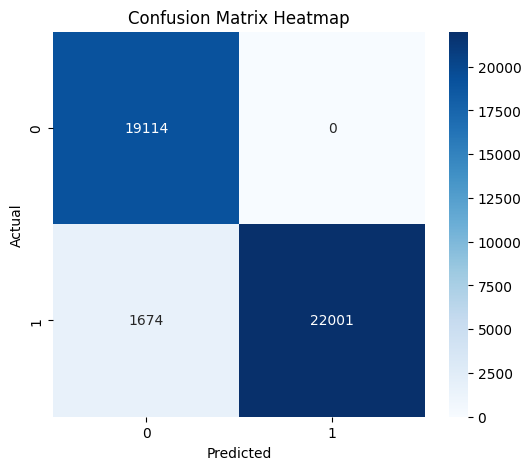

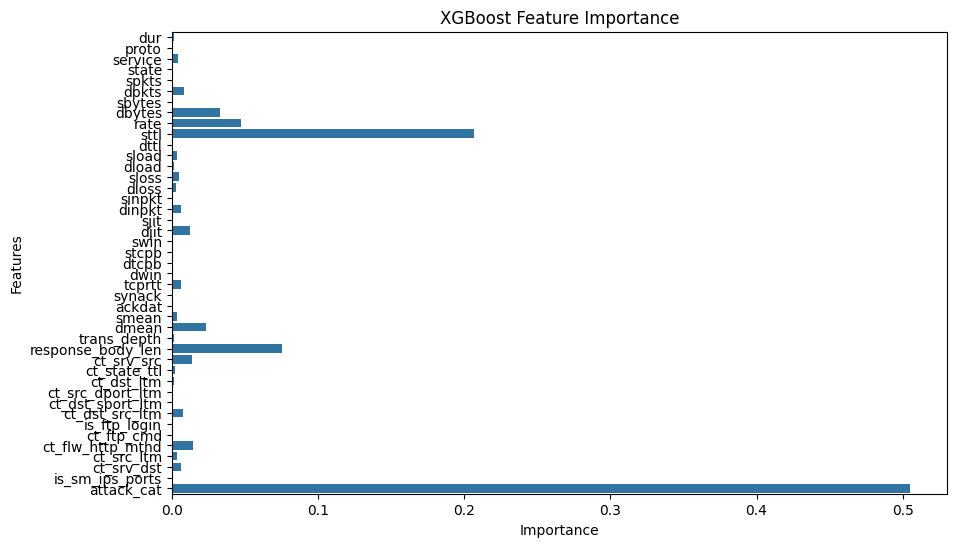

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Plot
plt.figure(figsize=(10,6))
sns.barplot(x=xgb.feature_importances_, y=X_train.columns)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


Save the Trained Model

In [29]:
import joblib
joblib.dump(xgb, 'xgboost_model.pkl')
print(" Model saved as 'xgboost_model.pkl'")

 Model saved as 'xgboost_model.pkl'
